Se utilizó la Pima Indians Diabetes Database (PIDD),
cuya propiedad original pertenece al National Institute of
Diabetes and Digestive and Kidney Diseases, y los datos fueron
obtenidos del UCI Machine Learning Repository - Pima
Indians Diabetes Data Set (2016). Las unidades de análisis
consistieron en 768 mujeres residentes cerca de Phoenix,
Arizona, EEUU, pertenecientes a la etnia Pima y con al menos
21 años de edad.

In [1]:
# Carga de librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Carga del dataset
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


Descripción de los datos:

1. Embarazos: Cantidad de embarazos  de la paciente

2. Glucosa: Concentración de glucosa plasmática a las 2hs de una
prueba de tolerancia oral a la glucosa (G120 mg/dl)

3. Presion Arterial: Presión arterial diastólica (PAD mmHg.)

4. Espesor de Piel: Grosor del pliegue de la piel del tríceps (GPPT mm)

5. Insulina: Concentración de insulina sérica a las 2hs de una prueba
de tolerancia oral a la glucosa (I120 mU/ml)

6. IMC = Indice de Masa Corporal

7. Función de Ascendencia Diabética ó Función pedigrí de la diabetes: Antecedentes Familiares o función de pedigrí de diabetes
(FPD)

8. Edad: Tiempo de vida de la persona.

9. Diabetes ó Resultado: Esta variable determina si la persona tiene Diabetes o no la tiene.

In [5]:
df = pd.read_csv("diabetes.csv")
df.head() # Observando las primeras filas

,Embarazos,Glucosa,PresionArterial,GrosorPiel,Insulina,IMC,FuncionAscendenciaDiabetica,Edad,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


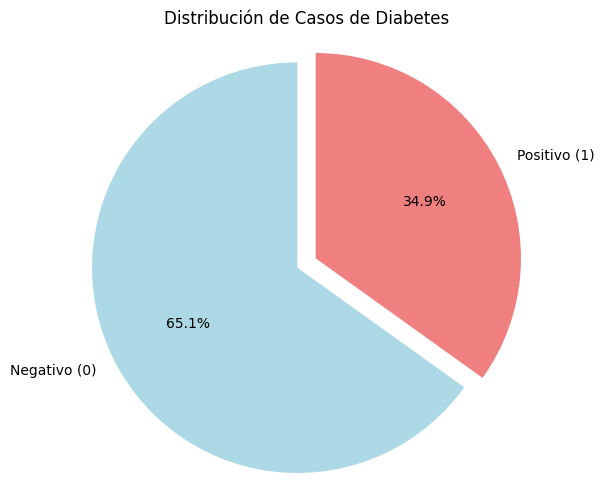

In [6]:
conteo_diabetes = df['Diabetes'].value_counts()
labels = ['Negativo (0)', 'Positivo (1)']
colors = ['lightblue', 'lightcoral']
explode = (0, 0.1)  # resaltar el positivo
plt.figure(figsize=(6,6))
plt.pie(conteo_diabetes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90)
plt.title('Distribución de Casos de Diabetes')
plt.axis('equal')
plt.show()

Cantidad de filas y columnas del DATASETS

In [7]:
df.shape

(768, 9)

Vemos las claves del dataframe. En nuestro se editó el archico CSV antes de cargarlo

In [8]:
df.keys()

Index(['Embarazos', 'Glucosa', 'PresionArterial', 'GrosorPiel', 'Insulina',
       'IMC', 'FuncionAscendenciaDiabetica', 'Edad', 'Diabetes'],
      dtype='object')

Comprobamos que no existan datos faltantes (nulos)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Embarazos                    768 non-null    int64  
 1   Glucosa                      768 non-null    int64  
 2   PresionArterial              768 non-null    int64  
 3   GrosorPiel                   768 non-null    int64  
 4   Insulina                     768 non-null    int64  
 5   IMC                          768 non-null    float64
 6   FuncionAscendenciaDiabetica  768 non-null    float64
 7   Edad                         768 non-null    int64  
 8   Diabetes                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Comprobamos la cantidad de datos faltantes de mi dataset

In [10]:
df.isnull().sum()

,0
Embarazos,0
Glucosa,0
PresionArterial,0
GrosorPiel,0
Insulina,0
IMC,0
FuncionAscendenciaDiabetica,0
Edad,0
Diabetes,0


Resumen estadistico

In [11]:
df.describe()

,Embarazos,Glucosa,PresionArterial,GrosorPiel,Insulina,IMC,FuncionAscendenciaDiabetica,Edad,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Estos son algunos puntos que podemos notar sobre los datos:

* Todas nuestras características son numéricas
* Tenemos un tamaño de muestra total de 768
* Algunas características tienen un valor mínimo de 0 que es sospechoso para los humanos (vivos):

  - Glucosa = 0         
  - Presión arterial mínima = 0
  - Espesor de piel mínimo = 0
  - Insulina = 0           
  - ICM = 0     

In [12]:
columnas_revisar = ['Glucosa', 'PresionArterial', 'GrosorPiel', 'Insulina', 'IMC']
# Crear un DataFrame con el conteo de ceros por columna
ceros_por_columna = (df[columnas_revisar] == 0).sum()
# Mostrar el resultado
print("Cantidad de ceros por columna:")
print(ceros_por_columna)

Cantidad de ceros por columna:
Glucosa              5
PresionArterial     35
GrosorPiel         227
Insulina           374
IMC                 11
dtype: int64


Cuadricula de histogramas para observasr las variables numericas

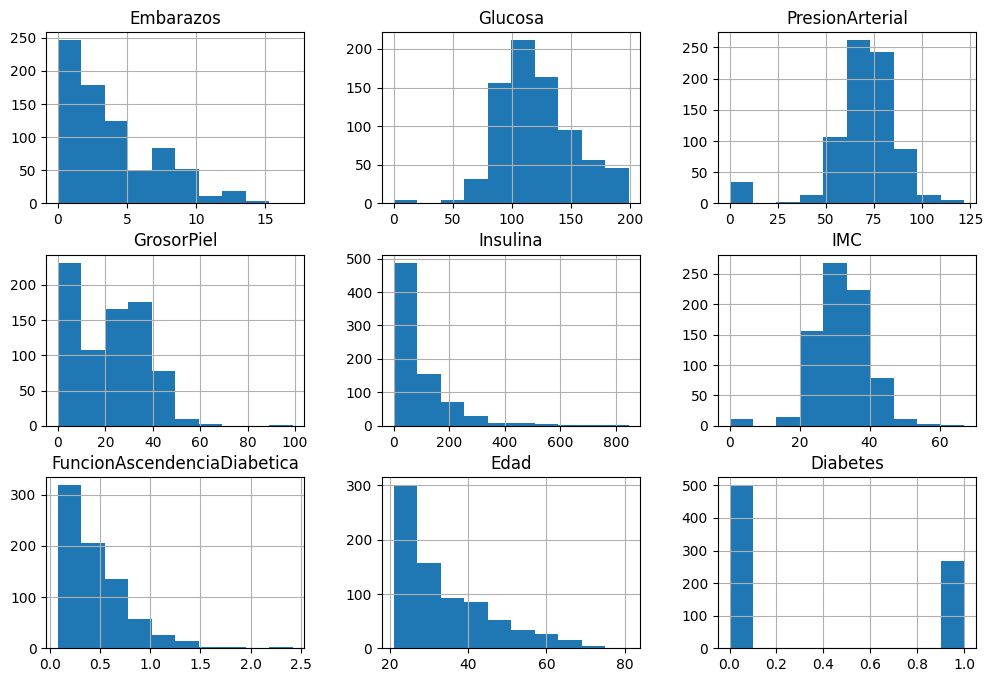

In [13]:
df.hist(figsize=(12,8))
plt.show()

MATRIZ DE CORRELACIONES

Observamos la correlación de las variables con la variable DIABETES (ultimna columna).

In [14]:
df.corr().Diabetes.sort_values()

,Diabetes
PresionArterial,0.065068
GrosorPiel,0.074752
Insulina,0.130548
FuncionAscendenciaDiabetica,0.173844
Embarazos,0.221898
Edad,0.238356
IMC,0.292695
Glucosa,0.466581
Diabetes,1.000000


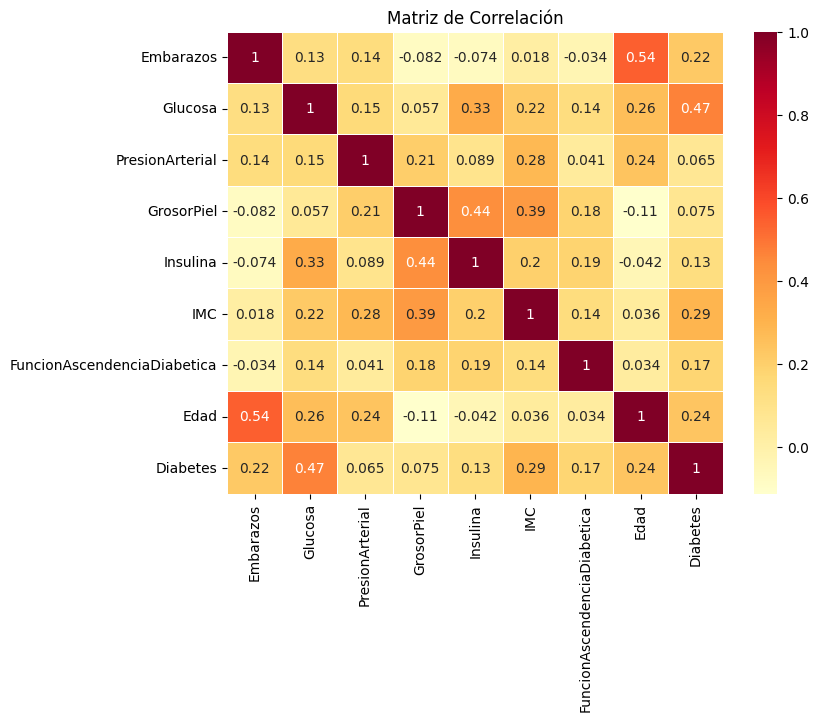

In [15]:
import seaborn as sns
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Matriz de dispersión

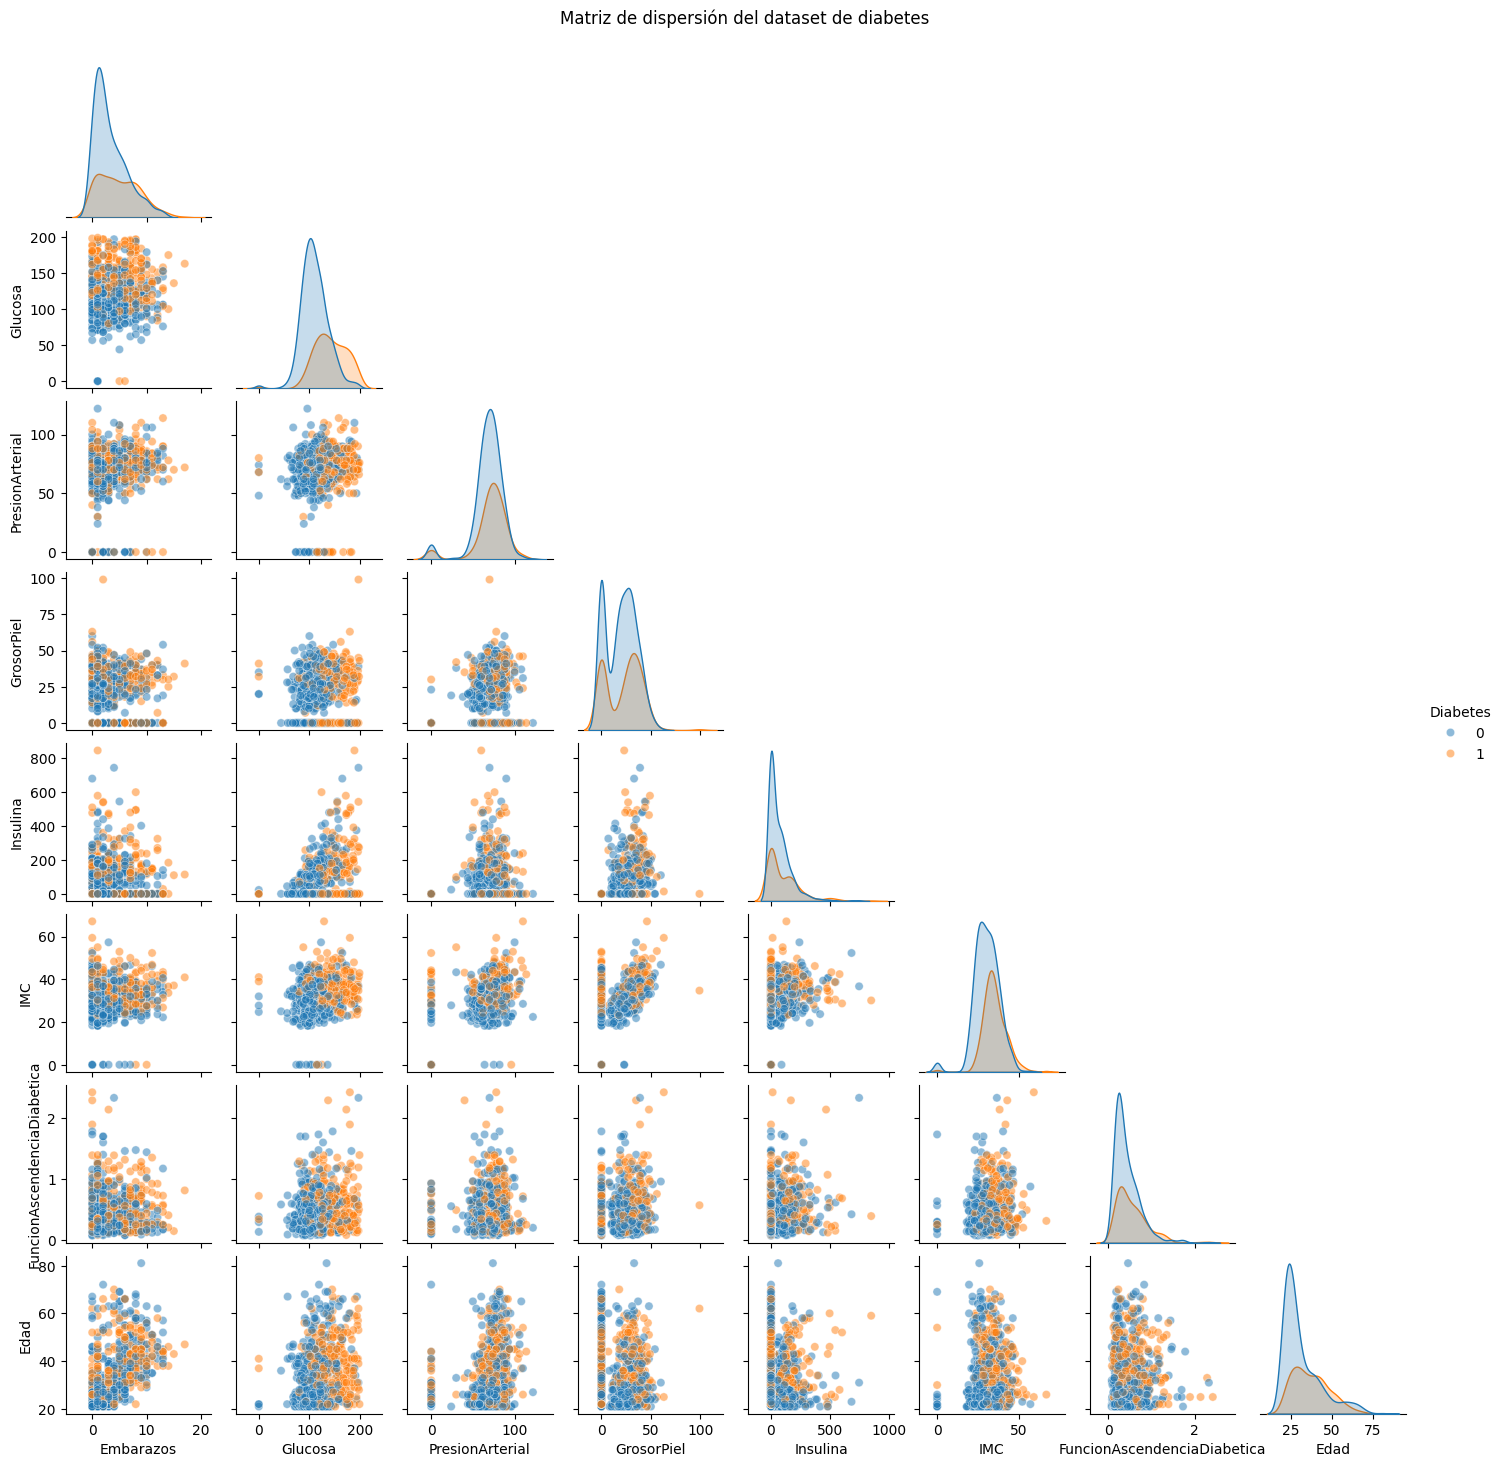

In [16]:
sns.pairplot(df, hue="Diabetes", corner=True, diag_kind="kde", plot_kws={"alpha": 0.5}, height=1.8)
plt.suptitle("Matriz de dispersión del dataset de diabetes", y=1.02)
plt.show()

A CREAR DATA TRAIN Y TEST!!!

TRAIN: 80% -TEST: 20%

Creamos las variables y separamos

X (predictoras)

y (etiquetas)

In [17]:
X = df.drop('Diabetes', axis=1) # Quitamos la variable respuesta Diabetes
y = df.Diabetes # Variable respuesta

In [18]:
from sklearn.model_selection import train_test_split

División en entrenamiento y testeo

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Reemplazamos los ceros solo después de dividir, usando la media del conjunto de entrenamiento

In [20]:
from sklearn.impute import SimpleImputer
# Columnas donde los ceros deben ser reemplazados
columnas_a_corregir = ['Glucosa', 'PresionArterial', 'GrosorPiel', 'Insulina', 'IMC']
# Crear el imputador: reemplazará ceros por la media
imputador = SimpleImputer(missing_values=0, strategy='mean')
# Ajustar el imputador solo con los datos de entrenamiento
X_train[columnas_a_corregir] = imputador.fit_transform(X_train[columnas_a_corregir])
# Aplicar el mismo imputador al conjunto de prueba
X_test[columnas_a_corregir] = imputador.transform(X_test[columnas_a_corregir])

In [21]:
X_train.describe()

,Embarazos,Glucosa,PresionArterial,GrosorPiel,Insulina,IMC,FuncionAscendenciaDiabetica,Edad
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.742671,121.847291,72.238983,28.595890,154.330247,32.352224,0.469168,32.907166
std,3.313264,30.102023,12.099189,8.409917,86.975027,6.935517,0.336847,11.503437
min,0.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,24.000000,116.000000,27.325000,0.241500,24.000000
50%,3.000000,118.000000,72.000000,28.595890,154.330247,32.000000,0.372500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,154.330247,36.375000,0.613750,40.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [22]:
# Guardar el conjunto de entrenamiento en un archivo Excel
X_train.to_excel("entrenamiento_diabetes.xlsx", index=False)
from google.colab import files
files.download("entrenamiento_diabetes.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Guardar el conjunto de prueba en Excel
X_test.to_excel("testeo_diabetes.xlsx", index=False)
from google.colab import files
files.download("testeo_diabetes.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ENTRENAMIENTO DE VARIOS MODELOS DE CLASIFICACIÓN

In [23]:
from sklearn.linear_model import SGDClassifier # Clasificador lineal Descenso de Gradiente Estocástico (Stochastic Gradient Descent)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # Máquina de vectores de soporte
from sklearn.neighbors import KNeighborsClassifier # Vecinos mas cercanos
from sklearn.linear_model import LogisticRegression # Regresión Logistica

Instanciación de las seis clases

In [24]:
sgd_clf = SGDClassifier()
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
forest_clf = RandomForestClassifier()
svc_clf = SVC()
knn_clf = KNeighborsClassifier(n_neighbors= 5) # 5 vecinos queremos que utilice
lr_clf = LogisticRegression()

Entrenamiento de los modelos

In [25]:
sgd_clf.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)
forest_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluación de desempeño de los modelos con la matriz de confusión

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [27]:
y_train_prediccion_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv = 5)
y_train_prediccion_tree = cross_val_predict(tree_clf, X_train, y_train, cv = 5)
y_train_prediccion_forest = cross_val_predict(forest_clf, X_train, y_train, cv = 5)
y_train_prediccion_svc = cross_val_predict(svc_clf, X_train, y_train, cv = 5)
y_train_prediccion_knn = cross_val_predict(knn_clf, X_train, y_train, cv = 5)
y_train_prediccion_lr = cross_val_predict(lr_clf, X_train, y_train, cv = 5)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Descenso de Gradiente Estocástico

In [28]:
print(confusion_matrix(y_train, y_train_prediccion_sgd))
print(f'Sensibilidad: {recall_score(y_train, y_train_prediccion_sgd)}')
print(f'Accuracy: {accuracy_score(y_train, y_train_prediccion_sgd)}')
print(f'Precision: {precision_score(y_train, y_train_prediccion_sgd)}')
print(f'F1 Score: {f1_score(y_train, y_train_prediccion_sgd)}')

[[325  76]
 [146  67]]
Sensibilidad: 0.3145539906103286
Accuracy: 0.6384364820846905
Precision: 0.46853146853146854
F1 Score: 0.37640449438202245


ÁRBOL DE DECISIÓN

In [29]:
print(confusion_matrix(y_train, y_train_prediccion_tree))
print(f'Sensibilidad: {recall_score(y_train, y_train_prediccion_tree)}')
print(f'Accuracy: {accuracy_score(y_train, y_train_prediccion_tree)}')
print(f'Precision: {precision_score(y_train, y_train_prediccion_tree)}')
print(f'F1 Score: {f1_score(y_train, y_train_prediccion_tree)}')

[[350  51]
 [103 110]]
Sensibilidad: 0.5164319248826291
Accuracy: 0.749185667752443
Precision: 0.6832298136645962
F1 Score: 0.5882352941176471


RANDOM FOREST

In [30]:
print(confusion_matrix(y_train, y_train_prediccion_forest))
print(f'Sensibilidad: {recall_score(y_train, y_train_prediccion_forest)}')
print(f'Accuracy: {accuracy_score(y_train, y_train_prediccion_forest)}')
print(f'Precision: {precision_score(y_train, y_train_prediccion_forest)}')
print(f'F1 Score: {f1_score(y_train, y_train_prediccion_forest)}')

[[340  61]
 [ 85 128]]
Sensibilidad: 0.6009389671361502
Accuracy: 0.762214983713355
Precision: 0.6772486772486772
F1 Score: 0.6368159203980099


Máquina de vectores de soporte

In [31]:
print(confusion_matrix(y_train, y_train_prediccion_svc))
print(f'Sensibilidad: {recall_score(y_train, y_train_prediccion_svc)}')
print(f'Accuracy: {accuracy_score(y_train, y_train_prediccion_svc)}')
print(f'Precision: {precision_score(y_train, y_train_prediccion_svc)}')
print(f'F1 Score: {f1_score(y_train, y_train_prediccion_svc)}')

[[367  34]
 [119  94]]
Sensibilidad: 0.4413145539906103
Accuracy: 0.750814332247557
Precision: 0.734375
F1 Score: 0.5513196480938416


KNN (Vecinos mas cercanos)

In [32]:
print(confusion_matrix(y_train, y_train_prediccion_knn))
print(f'Sensibilidad: {recall_score(y_train, y_train_prediccion_knn)}')
print(f'Accuracy: {accuracy_score(y_train, y_train_prediccion_knn)}')
print(f'Precision: {precision_score(y_train, y_train_prediccion_knn)}')
print(f'F1 Score: {f1_score(y_train, y_train_prediccion_knn)}')

[[324  77]
 [ 95 118]]
Sensibilidad: 0.5539906103286385
Accuracy: 0.7198697068403909
Precision: 0.6051282051282051
F1 Score: 0.5784313725490197


REGRESIÓN LOGISTICA

In [33]:
print(confusion_matrix(y_train, y_train_prediccion_lr))
print(f'Sensibilidad: {recall_score(y_train, y_train_prediccion_lr)}')
print(f'Accuracy: {accuracy_score(y_train, y_train_prediccion_lr)}')
print(f'Precision: {precision_score(y_train, y_train_prediccion_lr)}')
print(f'F1 Score: {f1_score(y_train, y_train_prediccion_lr)}')

[[350  51]
 [ 93 120]]
Sensibilidad: 0.5633802816901409
Accuracy: 0.7654723127035831
Precision: 0.7017543859649122
F1 Score: 0.625


Graficamos el arbol de decision:
*   GINI: medida de impureza (falta de homogeneidad). Cuanto mayor sea el valor del Índice de Gini, mayor será la probabilidad de que se produzcan clasificaciones erróneas.
*   SAMPLES: número de observaciones o ejemplos (filas de datos) que llegan a un nodo específico del árbol durante el entrenamiento.
*   VALUE: es una lista (o vector) que muestra el número de muestras de cada clase presentes en ese nodo.

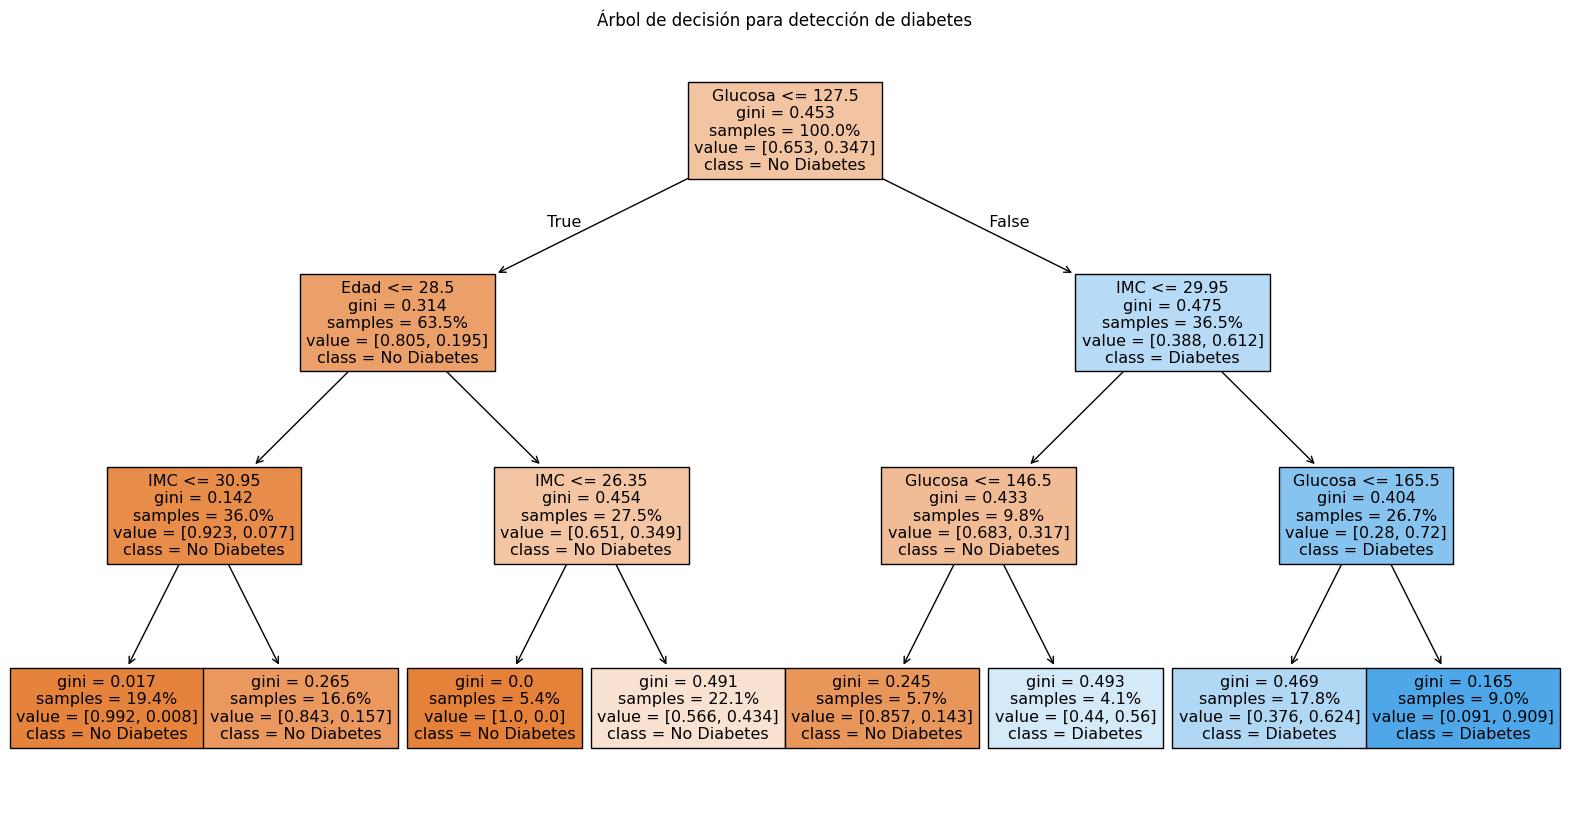

In [34]:
from sklearn.tree import plot_tree
# Paso 7: Visualizar el árbol
plt.figure(figsize=(20,10))
plot_tree(tree_clf, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True, proportion=True)
plt.title("Árbol de decisión para detección de diabetes")
plt.show()

Graficamos RANDOM FOREST

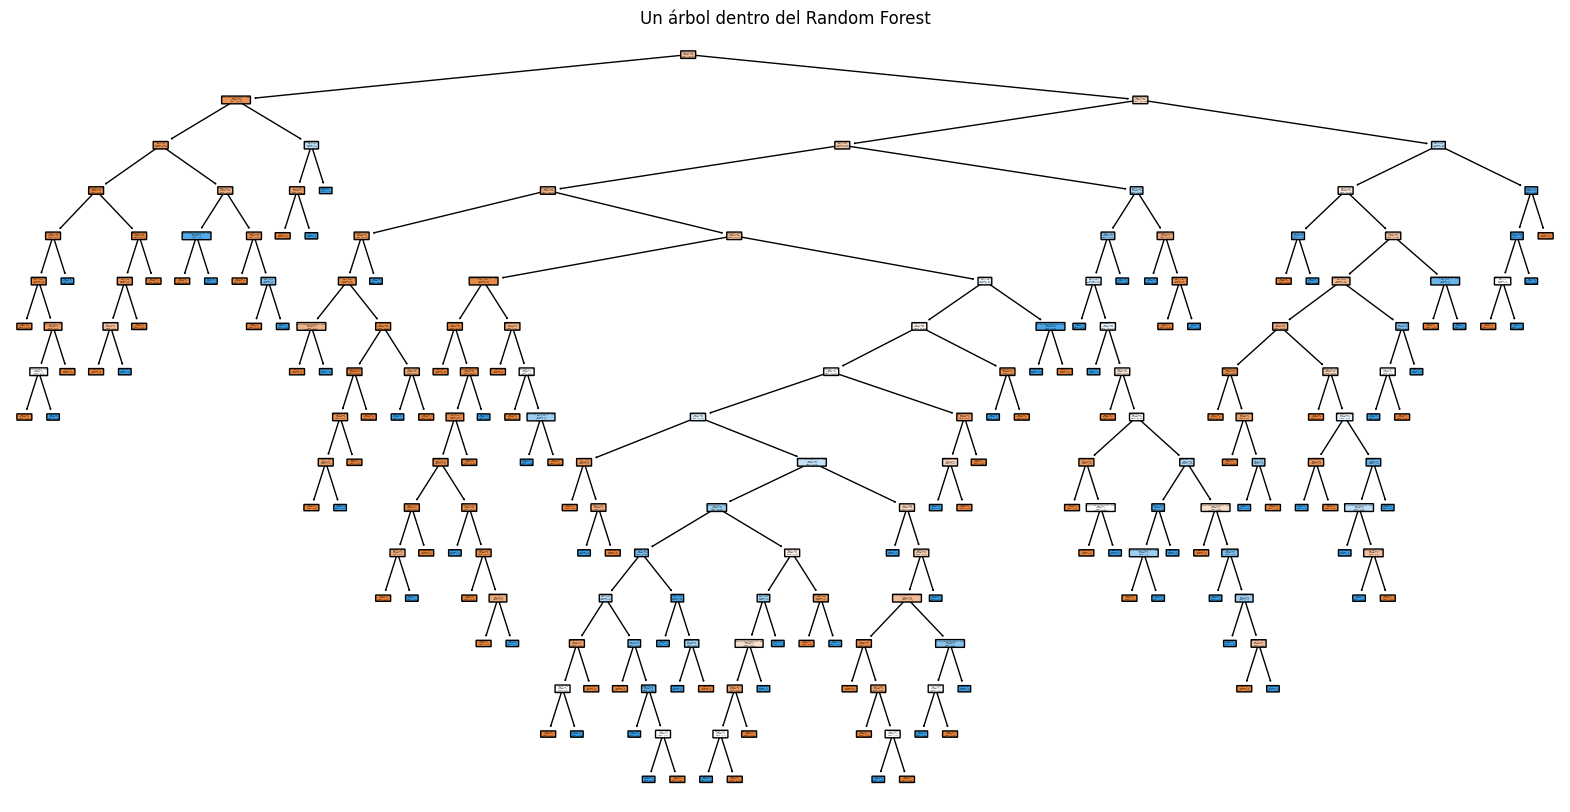

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Seleccionar uno de los árboles (por ejemplo, el primero)
tree = forest_clf.estimators_[0]

# Graficar el árbol
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True, rounded=True)
plt.title("Un árbol dentro del Random Forest")
plt.show()

Guardamos el modelo de Arbol de Decisión

In [36]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(tree_clf, 'modelo_arbol_decision.pkl')

# Descargar el archivo a tu computadora
from google.colab import files
files.download('modelo_arbol_decision.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ARMAMOS LA WEB

In [37]:
!pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [38]:
from google.colab import files
uploaded = files.upload()

Saving modelo_arbol_decision.pkl to modelo_arbol_decision (1).pkl


In [39]:
app_code = """import streamlit as st
import numpy as np
import joblib
from datetime import datetime

st.markdown(\"\"\"
    <style>
        @import url('https://fonts.googleapis.com/css2?family=Roboto:wght@400;500;700&display=swap');
        body, .main {
            background-color: #ffffff !important;
            color: #333333 !important;
            font-family: 'Roboto', sans-serif !important;
        }
        .top-bar {
            background: #005b96 !important;
            color: white !important;
            padding: 0.8rem 2rem !important;
            font-weight: 700 !important;
            box-shadow: 0 2px 10px rgba(0,0,0,0.2) !important;
        }
        .clinical-report {
            border-radius: 8px !important;
            padding: 1.5rem !important;
            margin-top: 1.5rem !important;
            border-left: 6px solid !important;
        }
        .negative-result {
            background: #f5fffa !important;
            border-left-color: #008a5e !important;
            border: 2px solid #008a5e !important;
        }
        .positive-result {
            background: #fff5f5 !important;
            border-left-color: #c5221f !important;
            border: 2px solid #c5221f !important;
        }
        h1, h2, h3, h4, h5, h6, p, li, span, div {
            color: #000000 !important;
        }

        /* Eliminar espacio superior */
        .block-container {
            padding-top: 0.5rem !important;
        }

        /* Modo oscuro automático */
        @media (prefers-color-scheme: dark) {
            body, .main {
                background-color: #1e1e1e !important;
                color: #ffffff !important;
            }
            .top-bar {
                background: #003b6f !important;
                color: white !important;
            }
            h1, h2, h3, h4, h5, h6, p, li, span, div {
                color: #ffffff !important;
            }
            .clinical-report {
                background-color: #2a2a2a !important;
            }
        }

        /* Responsivo */
        @media (max-width: 768px) {
            .clinical-report {
                padding: 1rem !important;
            }
            .top-bar {
                padding: 0.5rem 1rem !important;
                font-size: 1rem !important;
            }
        }
    </style>
\"\"\", unsafe_allow_html=True)

st.title("DiabetesScan Profesional")

modelo = joblib.load('modelo_arbol_decision.pkl')

with st.form("formulario"):
    st.subheader("📋 Datos del paciente")
    col1, col2 = st.columns(2)
    with col1:
        pregnancies = st.number_input("N° Embarazos", min_value=0, step=1, value=0)
        edad = st.number_input("Edad (años)", min_value=0, step=1, value=0)
    with col2:
        diabetes_pedigree = st.number_input("Historial Familiar (DPF)", min_value=0.0, value=0.0, step=0.01)

    glucosa = st.number_input("Glucosa (mg/dL)", min_value=0.0, value=0.0, step=1.0)
    presion_arterial = st.number_input("Presión Arterial (mm Hg)", min_value=0.0, value=0.0, step=1.0)
    grosor_piel = st.number_input("Pliegue Cutáneo (mm)", min_value=0.0, value=0.0, step=1.0)
    insulina = st.number_input("Insulina (μU/mL)", min_value=0.0, value=0.0, step=1.0)
    imc = st.number_input("IMC (kg/m²)", min_value=0.0, value=0.0, step=0.1)

    submit = st.form_submit_button("🔎 Analizar Riesgo")

if submit:
    entrada = np.array([[pregnancies, glucosa, presion_arterial, grosor_piel, insulina, imc, diabetes_pedigree, edad]])
    prediccion = modelo.predict(entrada)
    next_year = datetime.now().replace(year=datetime.now().year + 1).strftime('%d/%m/%Y')

    if prediccion[0] == 1:
        st.markdown(\"\"\"
        <div class="clinical-report positive-result">
            <h3 style="margin:0;">ALTO RIESGO DE DIABETES</h3>
            <p><strong>Interpretación Clínica:</strong> Alta probabilidad de diabetes tipo 2 según el análisis predictivo.</p>
            <ol>
                <li>Consulta endocrinológica urgente</li>
                <li>Prueba de HbA1c y perfil lipídico</li>
                <li>Control glucémico estricto</li>
                <li>Programa de modificación de hábitos</li>
            </ol>
            <p><strong>Protocolo:</strong> DM-URG-01 • <strong>Prioridad:</strong> Alta</p>
        </div>
        \"\"\", unsafe_allow_html=True)
    else:
        st.markdown(f\"\"\"
        <div class="clinical-report negative-result">
            <h3 style="margin:0;">RIESGO BAJO DE DIABETES</h3>
            <p><strong>Interpretación:</strong> No se detecta riesgo significativo de diabetes.</p>
            <ul>
                <li>Control anual de glucosa</li>
                <li>Perfil lipídico cada 2 años</li>
                <li>Dieta mediterránea</li>
                <li>150 min/semana de ejercicio</li>
                <li>IMC &lt; 25</li>
            </ul>
            <p>Próximo control: <strong>{next_year}</strong></p>
        </div>
        \"\"\", unsafe_allow_html=True)"""

with open("app.py", "w") as f:
    f.write(app_code)


In [40]:
!nohup streamlit run app.py &>/dev/null &

In [41]:
from pyngrok import ngrok

# Si ya pusiste tu token anteriormente, omite esta línea
ngrok.set_auth_token("2vgznthId5aSseLZ9YxpZXiig9M_87GPF3RXyY49ktRXGrikH")

# Matar túneles anteriores y crear uno nuevo
ngrok.kill()
public_url = ngrok.connect(8501)
print("✅ Tu app está disponible en:", public_url)


✅ Tu app está disponible en: NgrokTunnel: "https://9e17-34-81-121-175.ngrok-free.app" -> "http://localhost:8501"
